In [1]:
import sys
sys.path.append('../')

import numpy as np
import core

%load_ext autoreload
%autoreload 2

from core.gme import GuidedModeExp

## Square lattice 

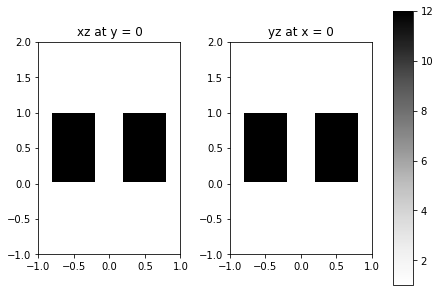

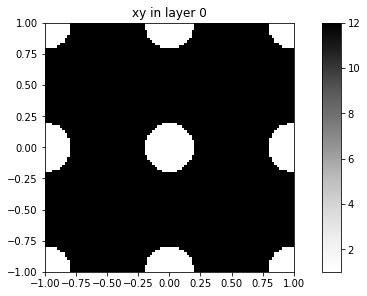

In [2]:
# Initialize a lattice
lattice = core.Lattice('square')
# Initialize a PhC (by default with eps = 1 in upper and lower cladding, we set upper one to 5)
phc = core.PhotCryst(lattice)
# Add a layer to the PhC with thickness 1 and background permittivity 10
phc.add_layer(d=1, eps_b=12)
# Add a shape to this layer 
# phc.add_shape('circle', {'x': 0, 'y': 0.4, 'r': 0.3, 'eps': 1}, layer_ind=0)
phc.add_shape('circle', {'x': 0, 'y': 0, 'r': 0.2, 'eps': 1}, layer_ind=0)
# Plot an overview picture
phc.plot_overview()

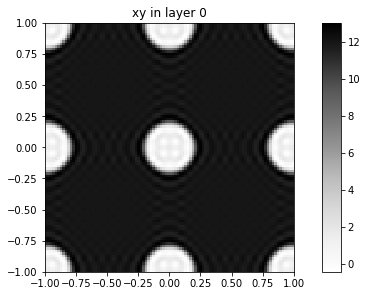

In [4]:
gme = GuidedModeExp(phc, gmax=5)
gme.plot_overview_ft()

## Two-layer hexagonal lattice

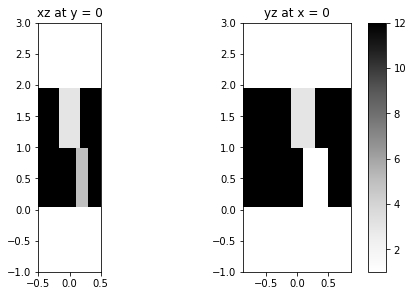

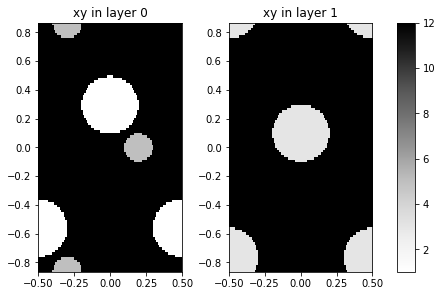

In [5]:
# Initialize a lattice
lattice = core.Lattice('hexagonal')
# Initialize a PhC (by default with eps = 1 in upper and lower cladding, we set upper one to 5)
phc = core.PhotCryst(lattice)
# Add a layer to the PhC with thickness 1 and background permittivity 10
phc.add_layer(d=1, eps_b=12)
# Add shapes to this layer 
phc.add_shape('circle', {'x': 0, 'y': 0.3, 'r': 0.2, 'eps': 1}, layer_ind=0)
phc.add_shape('circle', {'x': 0.2, 'y': 0, 'r': 0.1, 'eps': 5}, layer_ind=0)
# Add another layer and a shape
phc.add_layer(d=1, eps_b=12)
phc.layers[-1].add_shape('circle', {'x': 0, 'y': 0.1, 'r': 0.2, 'eps': 3})
# Plot an overview picture
phc.plot_overview()

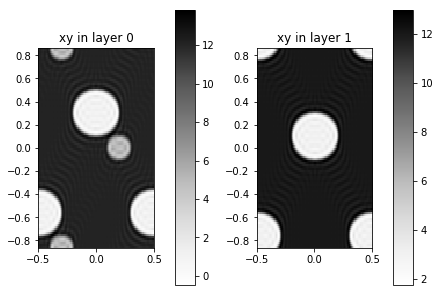

In [6]:
gme = GuidedModeExp(phc, gmax=10)
gme.plot_overview_ft()

## Oblique lattice

In [7]:
from core.phc import Lattice, PhotCryst
# Eventually need to check if this will work with core.set_backend()

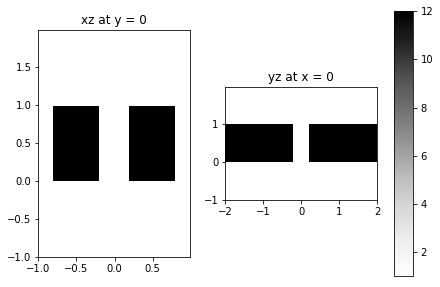

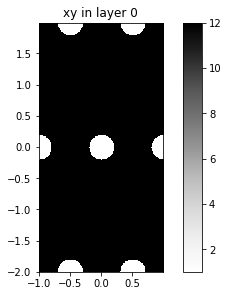

In [8]:
# Initialize a lattice
lattice = Lattice([1, 0], [0.5, 2])
# Initialize a PhC (by default with eps = 1 in upper and lower cladding, we set upper one to 5)
phc = PhotCryst(lattice)
# Add a layer to the PhC with thickness 1 and background permittivity 10
phc.add_layer(d=1, eps_b=12)
# Add a shape to this layer 
# phc.add_shape('circle', {'x': 0, 'y': 0.2, 'r': 0.4, 'eps': 1}, layer_ind=0)
phc.add_shape('circle', {'x': 0, 'y': 0, 'r': 0.2, 'eps': 1}, layer_ind=0)
# Plot an overview picture
phc.plot_overview()

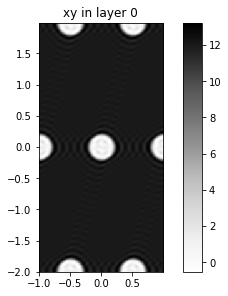

In [9]:
gme = GuidedModeExp(phc, gmax=5)
gme.plot_overview_ft()

## Square lattice with polygonal shapes

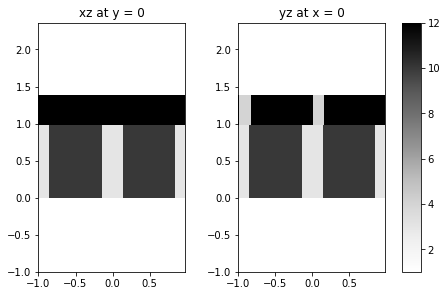

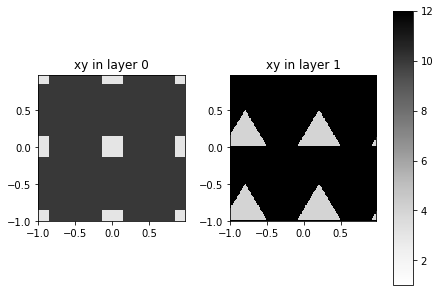

In [11]:
# Initialize a lattice
lattice = Lattice('square')

# We can also do polygonal shapes
phc = PhotCryst(lattice)
phc.add_layer(d=1, eps_b=10)

# Square; note that both PhotCryst and Layer classes have add_shape() methods
phc.layers[-1].add_shape('square', {'x_cent': 0, 'y_cent': 0, 'a': 0.3, 'eps': 3})

# Arbitrary polygon 
phc.add_layer(d=0.4, eps_b=12)
phc.layers[-1].add_shape('poly', {'x_edges': [-0.1, 0.5, 0.2], 'y_edges': [0, 0, 0.5], 'eps': 4})
phc.plot_overview()

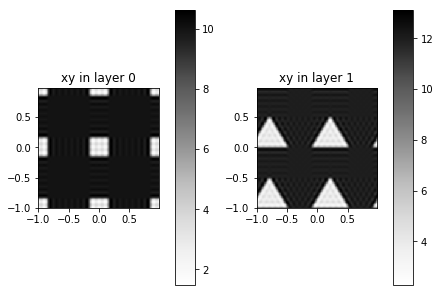

In [12]:
gme = GuidedModeExp(phc, gmax=5)
gme.plot_overview_ft()

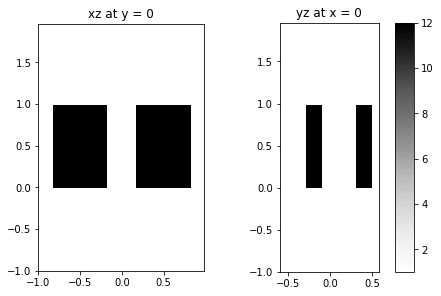

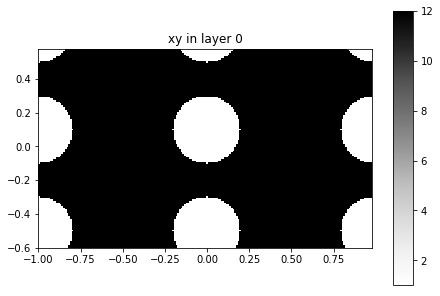

In [32]:
# Initialize a lattice
lattice = Lattice([1, 0], [0, 0.6])
# Initialize a PhC (by default with eps = 1 in upper and lower cladding, we set upper one to 5)
phc = PhotCryst(lattice)
# Add a layer to the PhC with thickness 1 and background permittivity 10
phc.add_layer(d=1, eps_b=12)
phc.add_shape('circle', {'x': 0, 'y': 0.1, 'r': 0.2, 'eps': 1}, layer_ind=0)
# Plot an overview picture
phc.plot_overview()

In [35]:
gme = GuidedModeExp(phc, gmax=1.9)

In [36]:
print(gme.gvec)

[[ -6.28318531  -6.28318531  -6.28318531   0.           0.
    0.           6.28318531   6.28318531   6.28318531]
 [-10.47197551   0.          10.47197551 -10.47197551   0.
   10.47197551 -10.47197551   0.          10.47197551]]


In [37]:
print(gme.G1)

[[ 0.          0.          0.          6.28318531  6.28318531  6.28318531
  12.56637061 12.56637061 12.56637061]
 [ 0.         10.47197551 20.94395102  0.         10.47197551 20.94395102
   0.         10.47197551 20.94395102]]


In [38]:
gme.run()